# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [3]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

C:\Users\abdal\AppData\Local\Temp\ipykernel_20436\4177423669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Data/train.csv')


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [4]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [6]:
train.shape

(100000, 28)

In [7]:
test.shape

(50000, 27)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [10]:
train.duplicated().sum()

0

In [11]:
test.duplicated().sum()

0

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

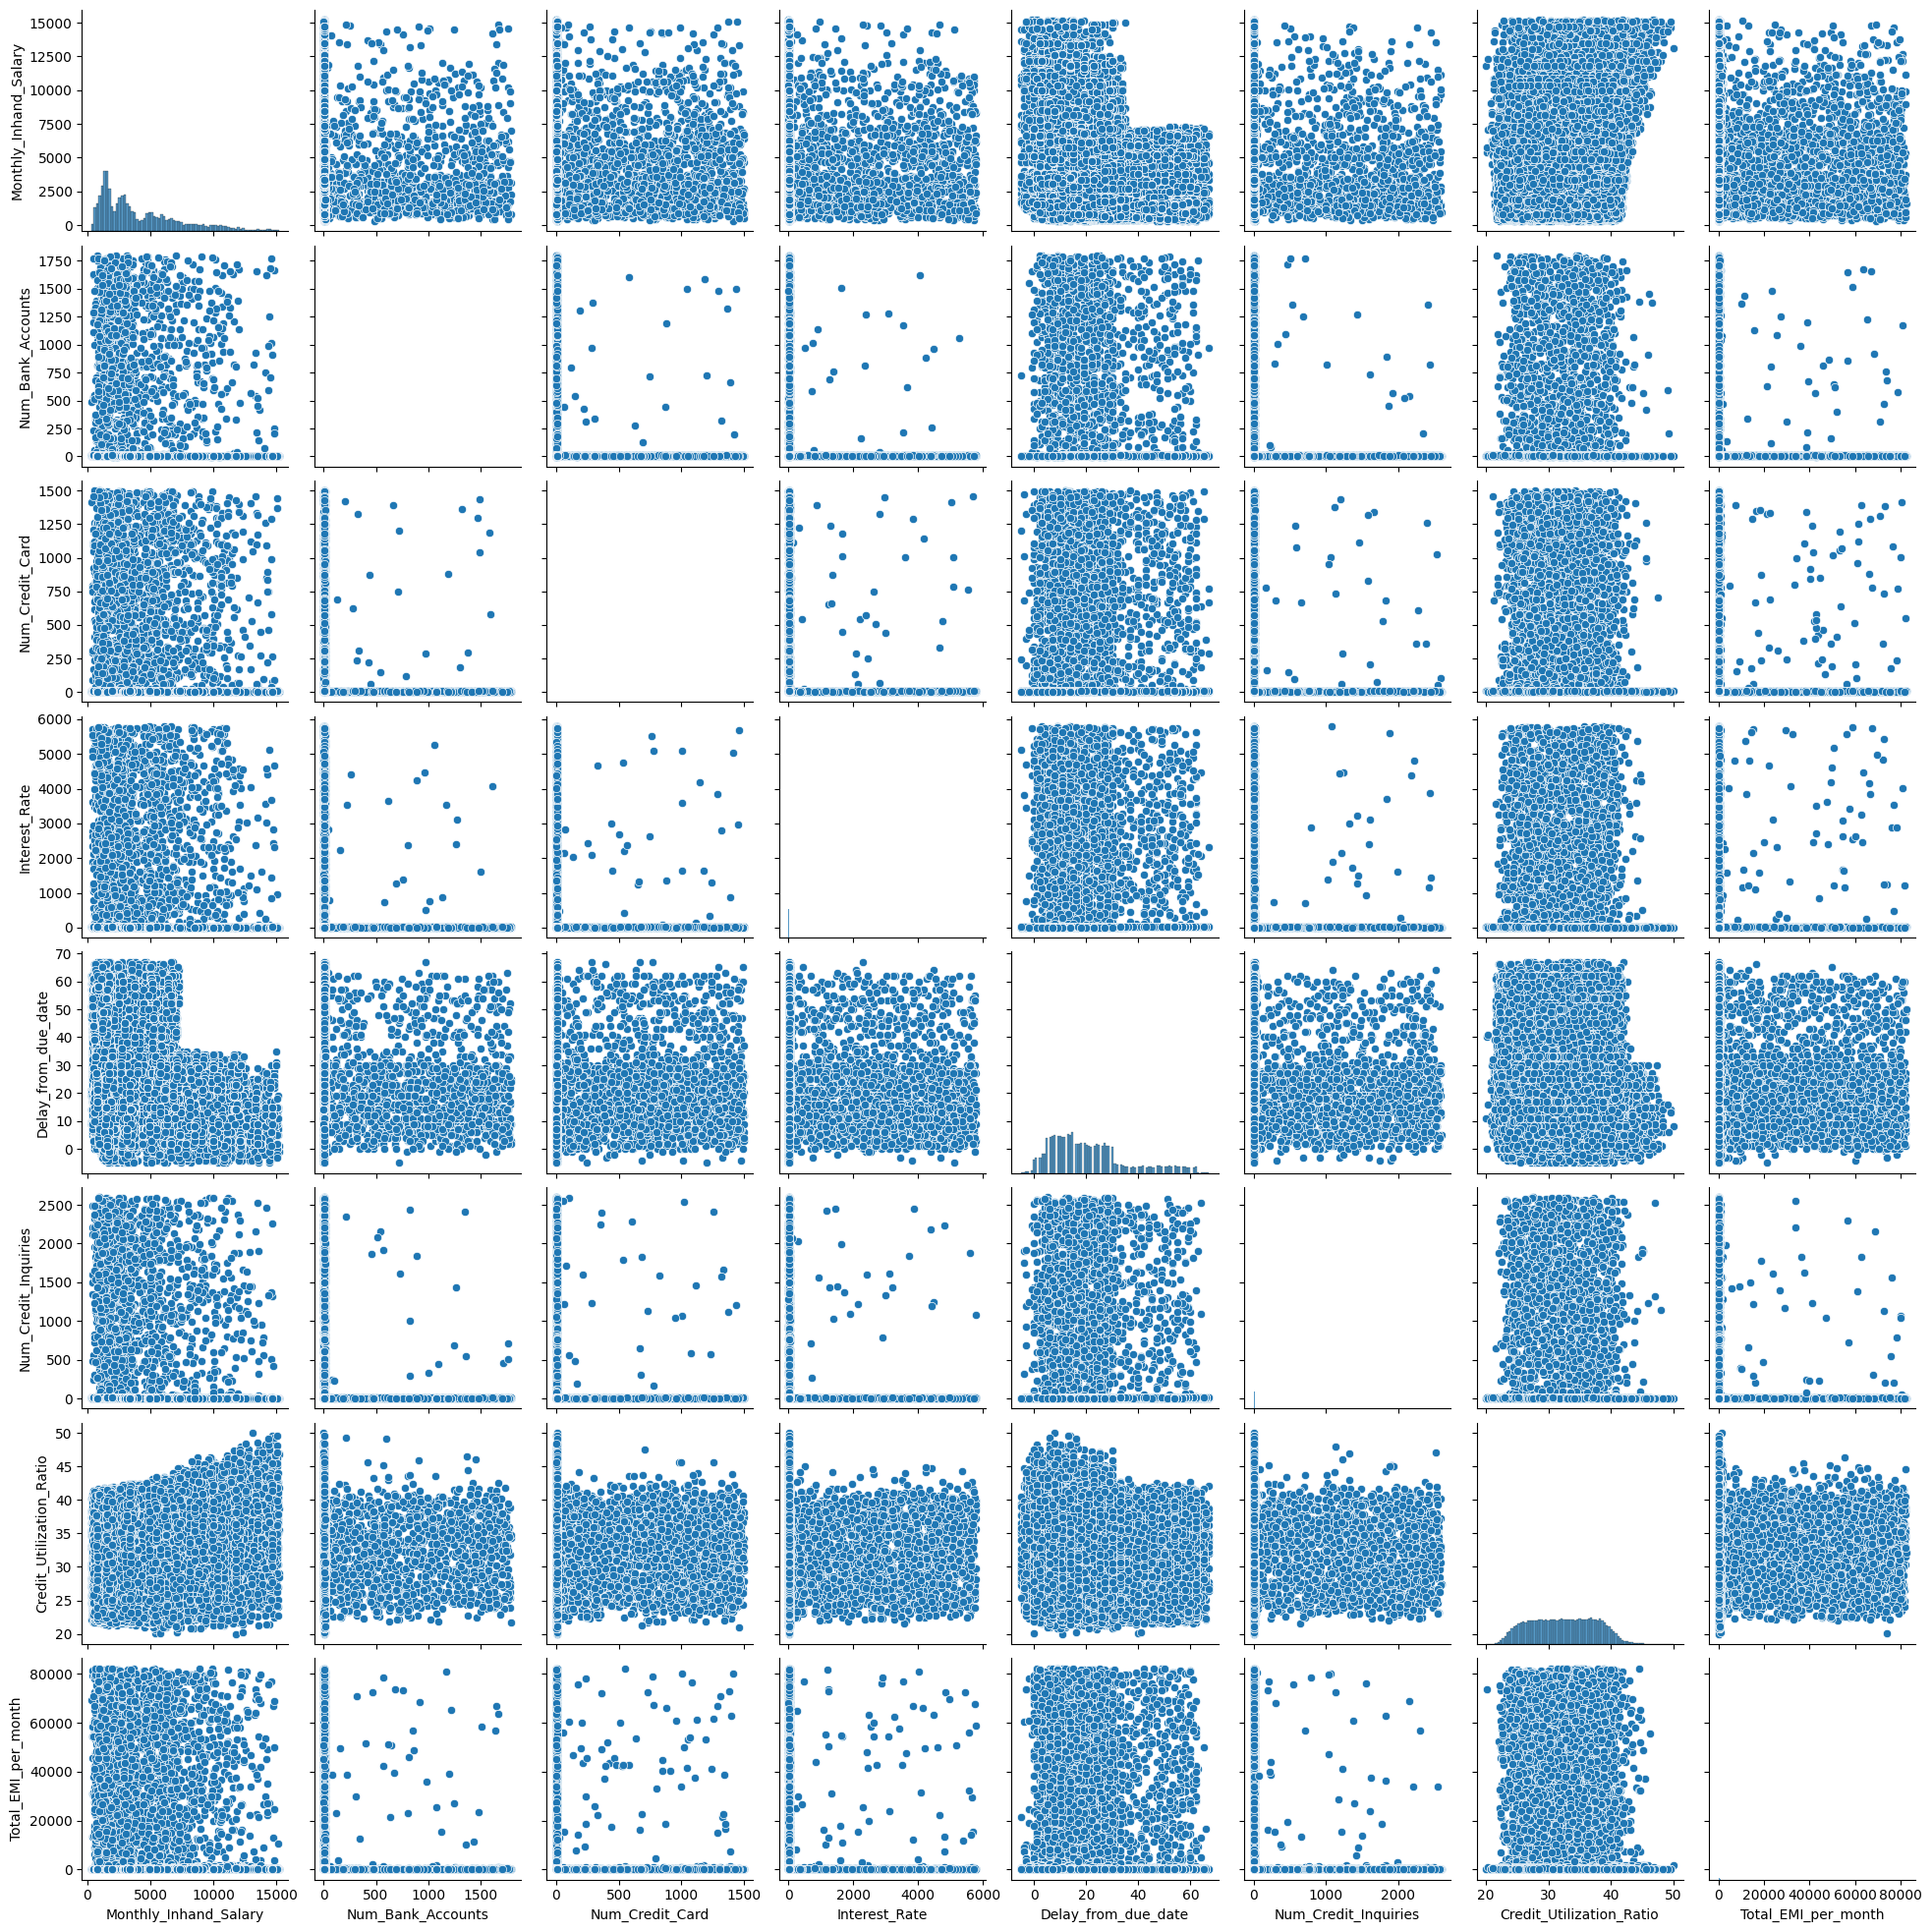

In [12]:
sns.pairplot(train)
plt.show()

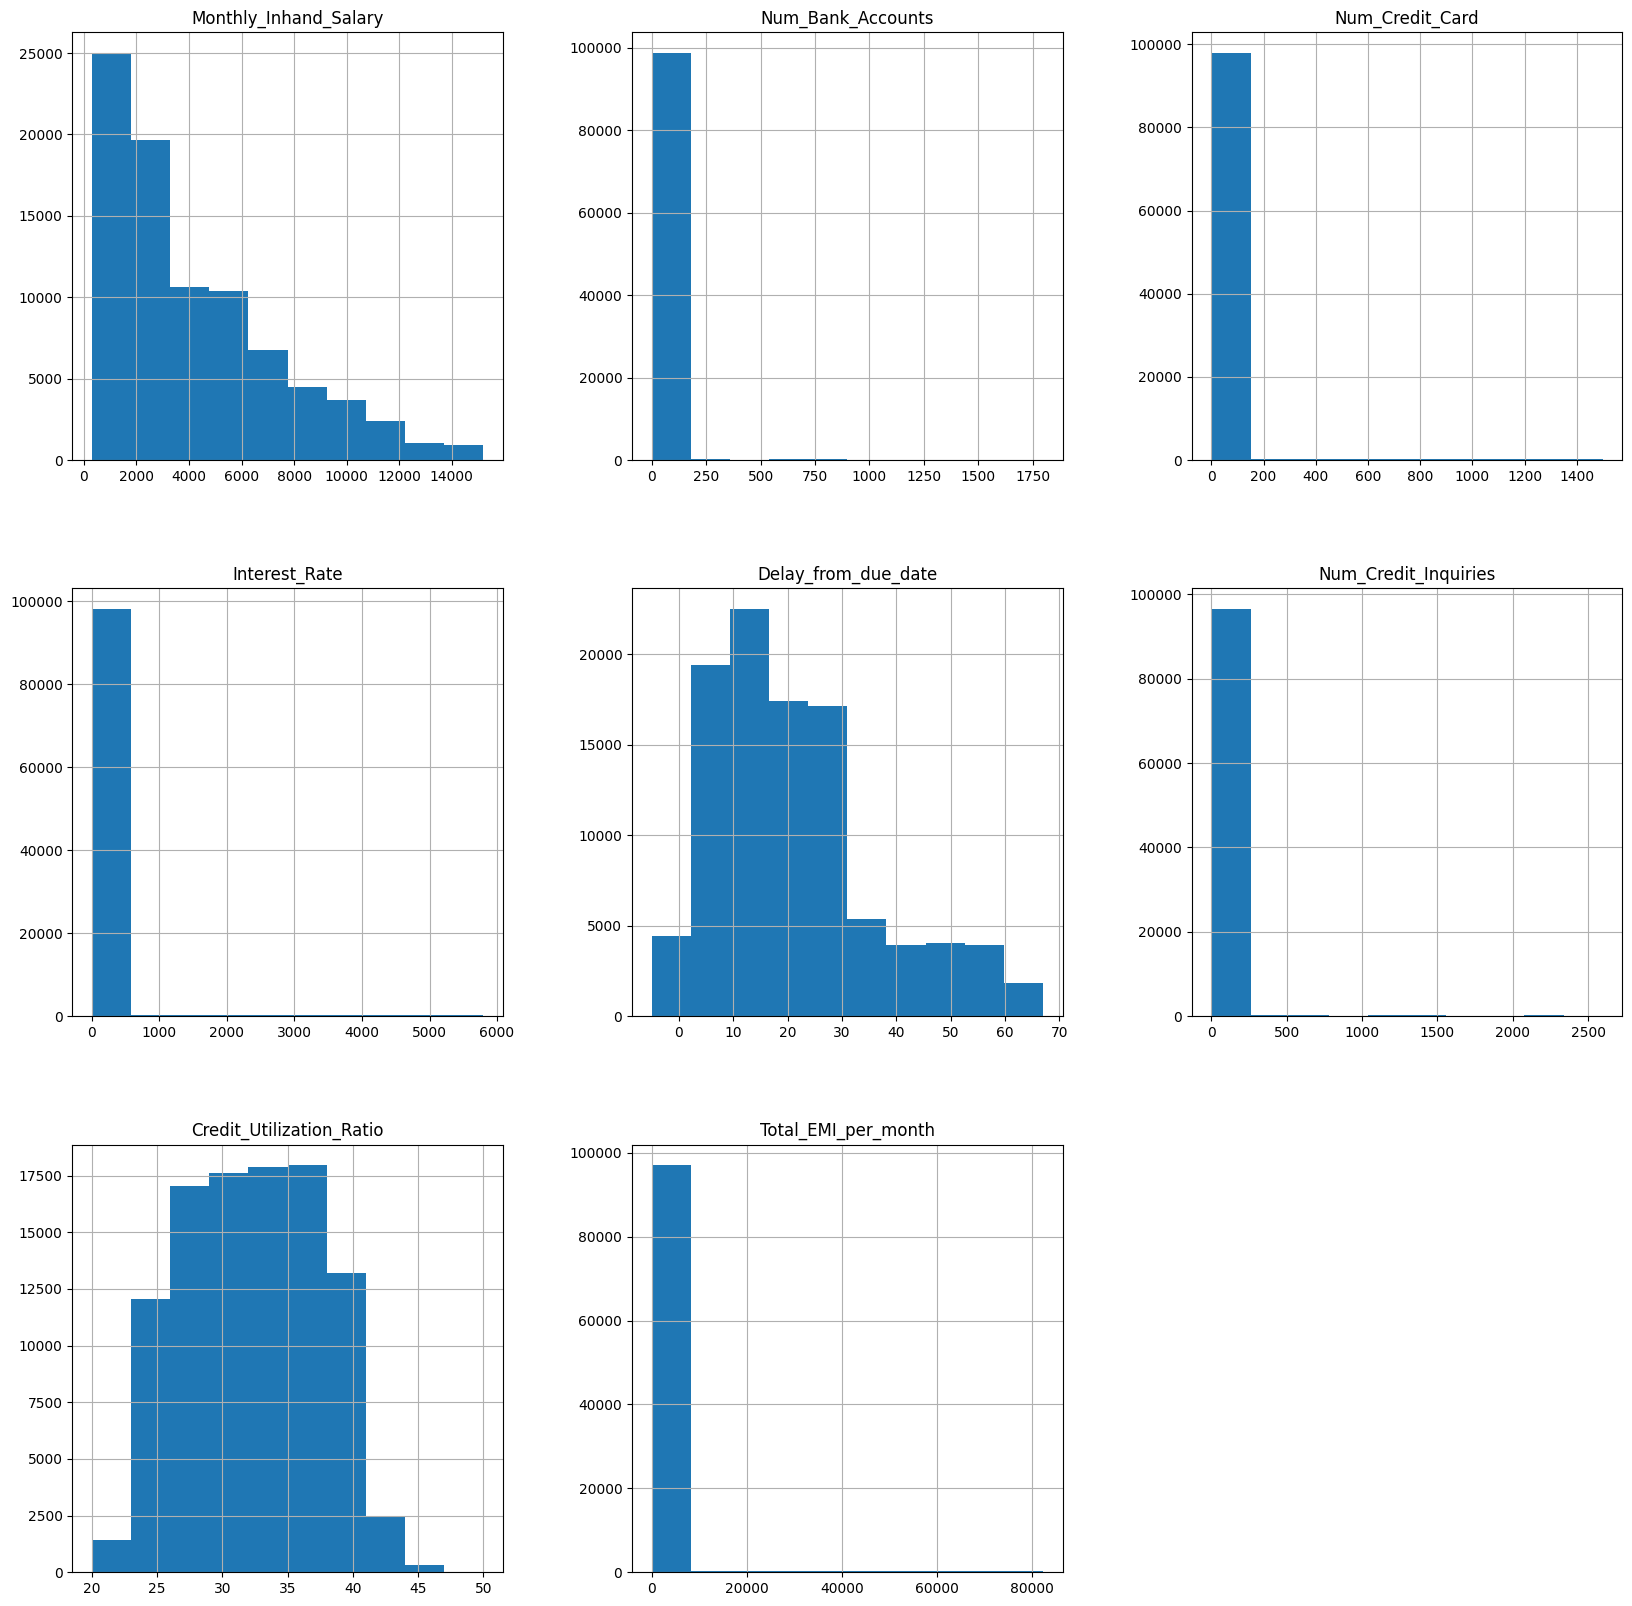

In [13]:
train.hist(figsize=(20, 20))
plt.show()

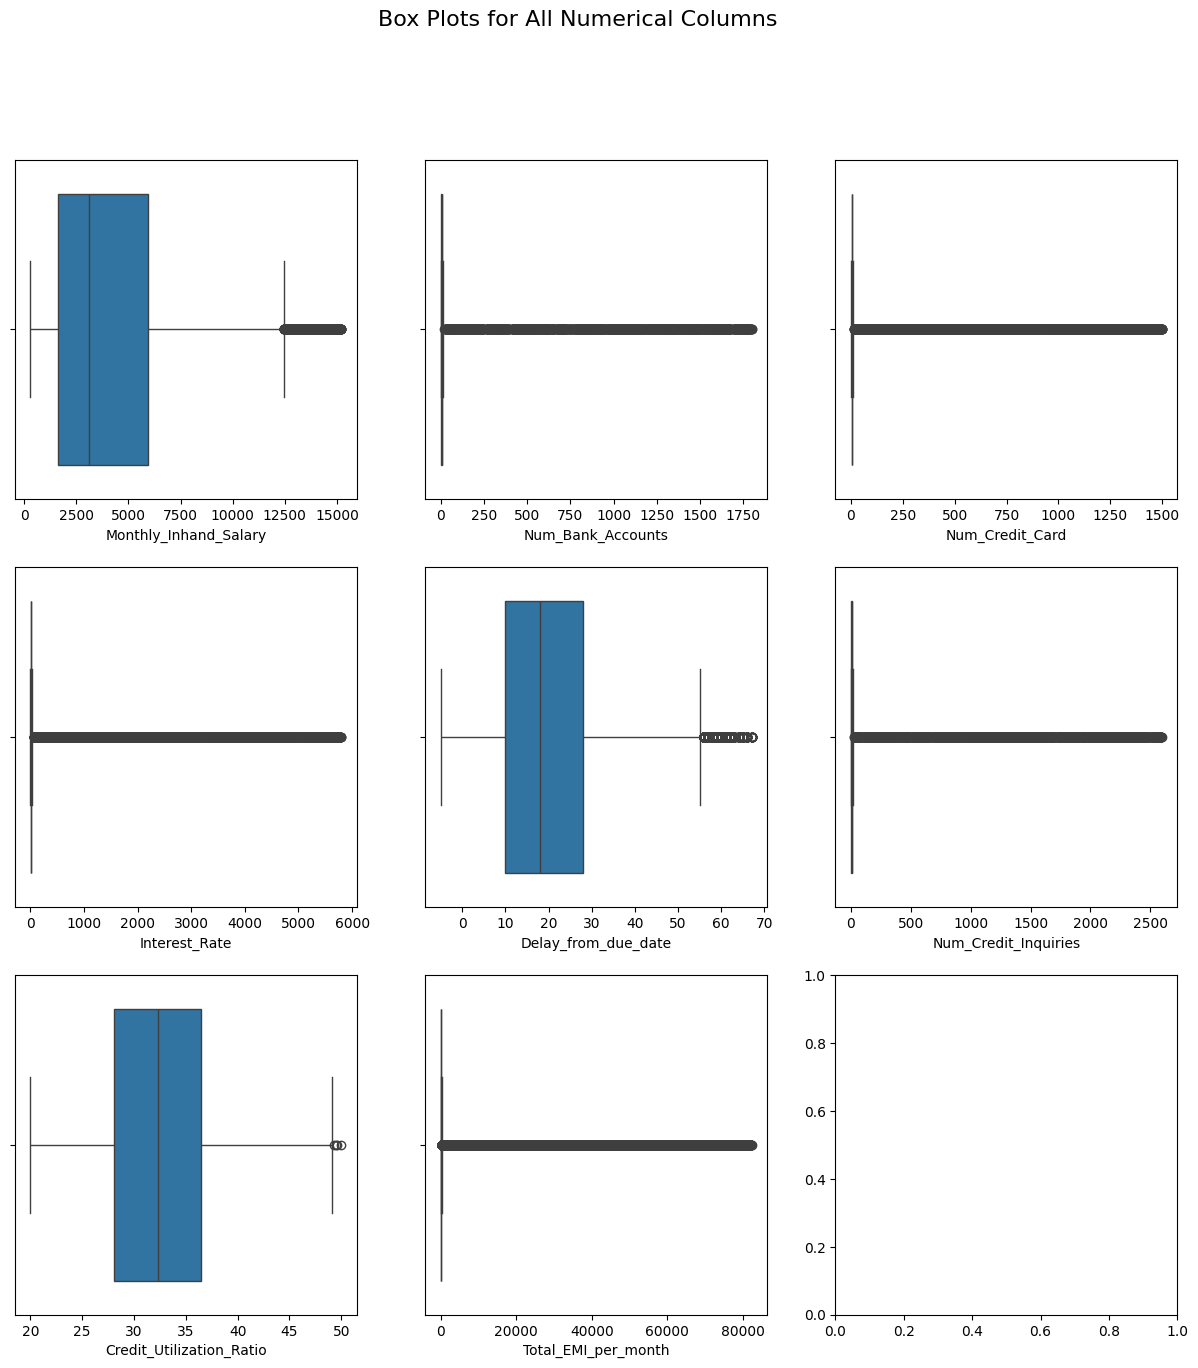

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Box Plots for All Numerical Columns', fontsize=16)

numerical_columns = train.select_dtypes(include=[np.number]).columns

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(x=train[column], ax=ax)

plt.show()

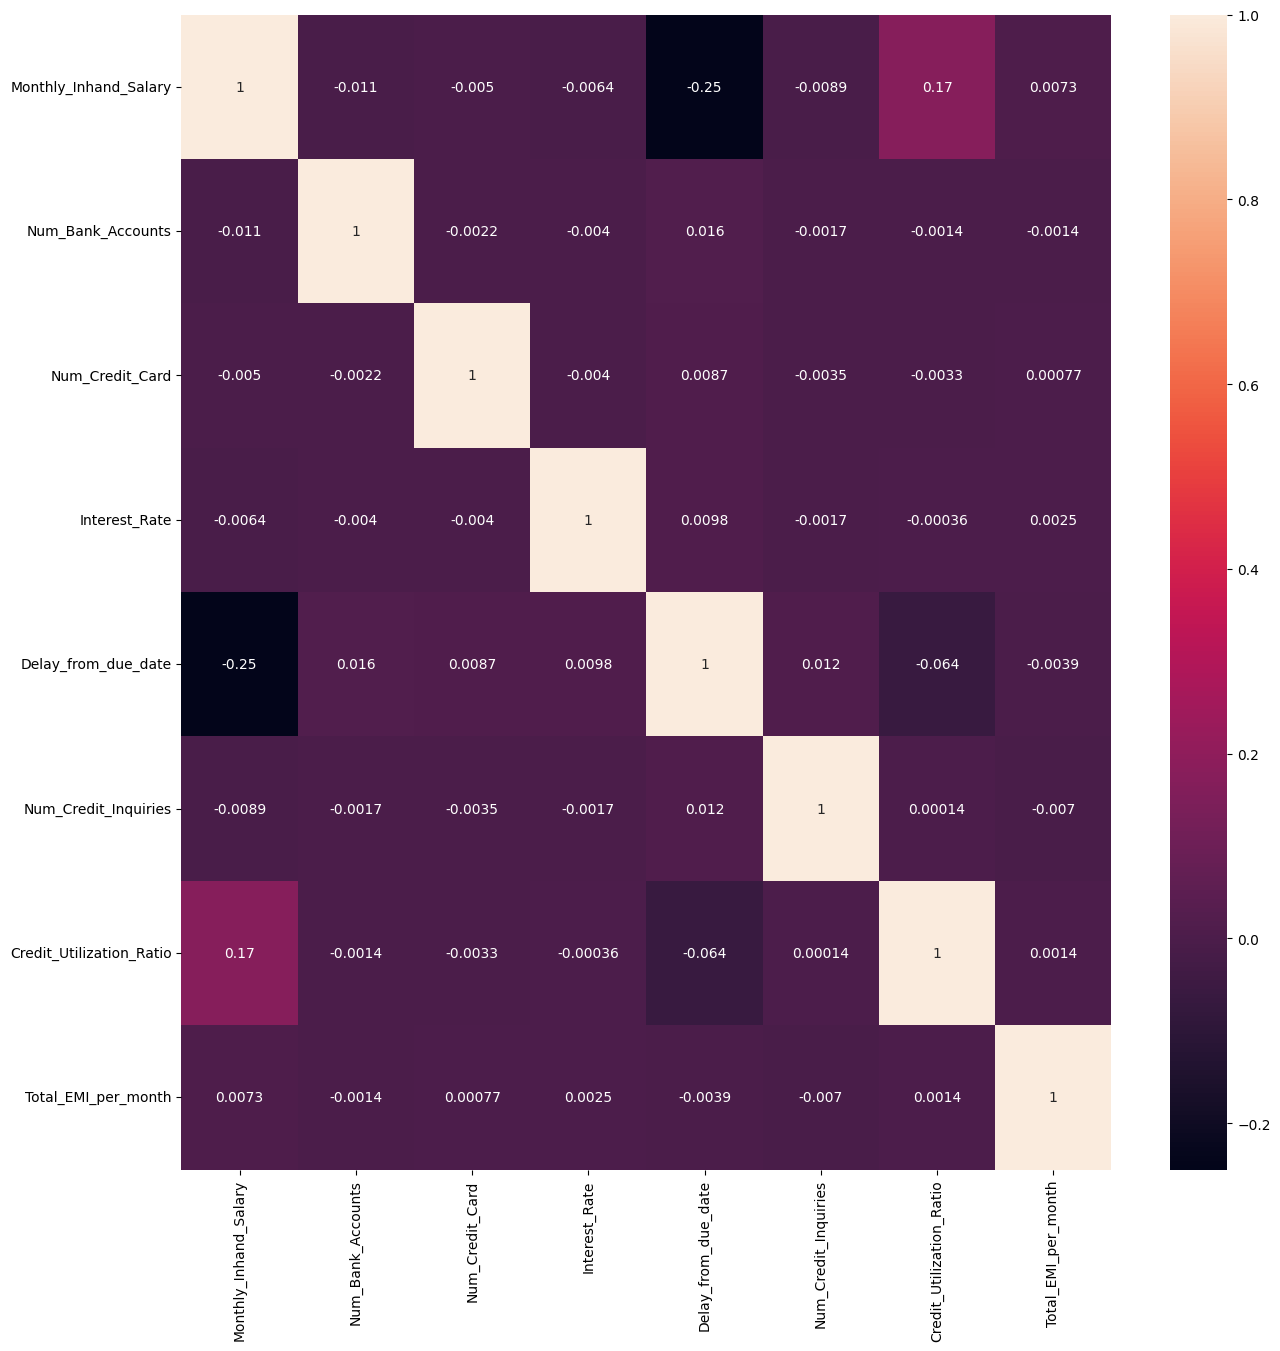

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.select_dtypes(include=[np.number]).corr(),annot=True)
plt.show()

This graphs before data cleaning and have a lot of outliers and corrupted data

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hint: It could be helpful to check `sklearn.preprocessing` module.

In [16]:
if train['Annual_Income'].dtype == 'object':
    train['Annual_Income'] = train['Annual_Income'].str.replace('_', '').astype(float)
    train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].str.replace('_', '').astype(float)

In [17]:
if train['Annual_Income'].dtype == 'object':
	train['Annual_Income'] = train['Annual_Income'].str.replace(',', '').astype(float)

In [18]:
train['Occupation'] = train['Occupation'].replace('_______', np.nan)
train['Credit_Mix'] = train['Credit_Mix'].replace('_', np.nan)
train['Payment_Behaviour'] = train['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [19]:
columns_to_convert = [
    'Monthly_Balance', 'Amount_invested_monthly', 'Age', 
    'Outstanding_Debt', 'Changed_Credit_Limit', 'Num_of_Loan'
]

for column in columns_to_convert:
    train[column] = pd.to_numeric(train[column], errors='coerce')

In [20]:
columns_to_remove_outliers = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
  'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
   'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
   'Amount_invested_monthly','Monthly_Balance'
]

for column in columns_to_remove_outliers:
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train[column] = np.where((train[column] < lower_bound) | (train[column] > upper_bound), np.nan, train[column])


In [21]:
columns_to_fill = [
    'Type_of_Loan', 'Credit_History_Age', 'Occupation', 'Annual_Income', 
    'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 
    'Amount_invested_monthly', 'Monthly_Balance', 'Outstanding_Debt', 
    'Changed_Credit_Limit', 'Num_of_Loan', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Delay_from_due_date', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Credit_Mix', 'Payment_Behaviour'
]

for column in columns_to_fill:
    train[[column]] = train[[column]].fillna(method='bfill')


C:\Users\abdal\AppData\Local\Temp\ipykernel_20436\2610021896.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train[[column]] = train[[column]].fillna(method='bfill')
C:\Users\abdal\AppData\Local\Temp\ipykernel_20436\2610021896.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train[[column]] = train[[column]].fillna(method='bfill')
C:\Users\abdal\AppData\Local\Temp\ipykernel_20436\2610021896.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train[[column]] = train[[column]].fillna(method='bfill')
C:\Users\abdal\AppData\Local\Temp\ipykernel_20436\2610021896.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train

In [22]:
train.dropna(subset=['Payment_Behaviour'], inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99999 entries, 0 to 99998
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        99999 non-null  object 
 1   Customer_ID               99999 non-null  object 
 2   Month                     99999 non-null  object 
 3   Name                      90014 non-null  object 
 4   Age                       99999 non-null  float64
 5   SSN                       99999 non-null  object 
 6   Occupation                99999 non-null  object 
 7   Annual_Income             99999 non-null  float64
 8   Monthly_Inhand_Salary     99999 non-null  float64
 9   Num_Bank_Accounts         99999 non-null  float64
 10  Num_Credit_Card           99999 non-null  float64
 11  Interest_Rate             99999 non-null  float64
 12  Num_of_Loan               99999 non-null  float64
 13  Type_of_Loan              99999 non-null  object 
 14  Delay_from_

In [24]:
train.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1, inplace=True)

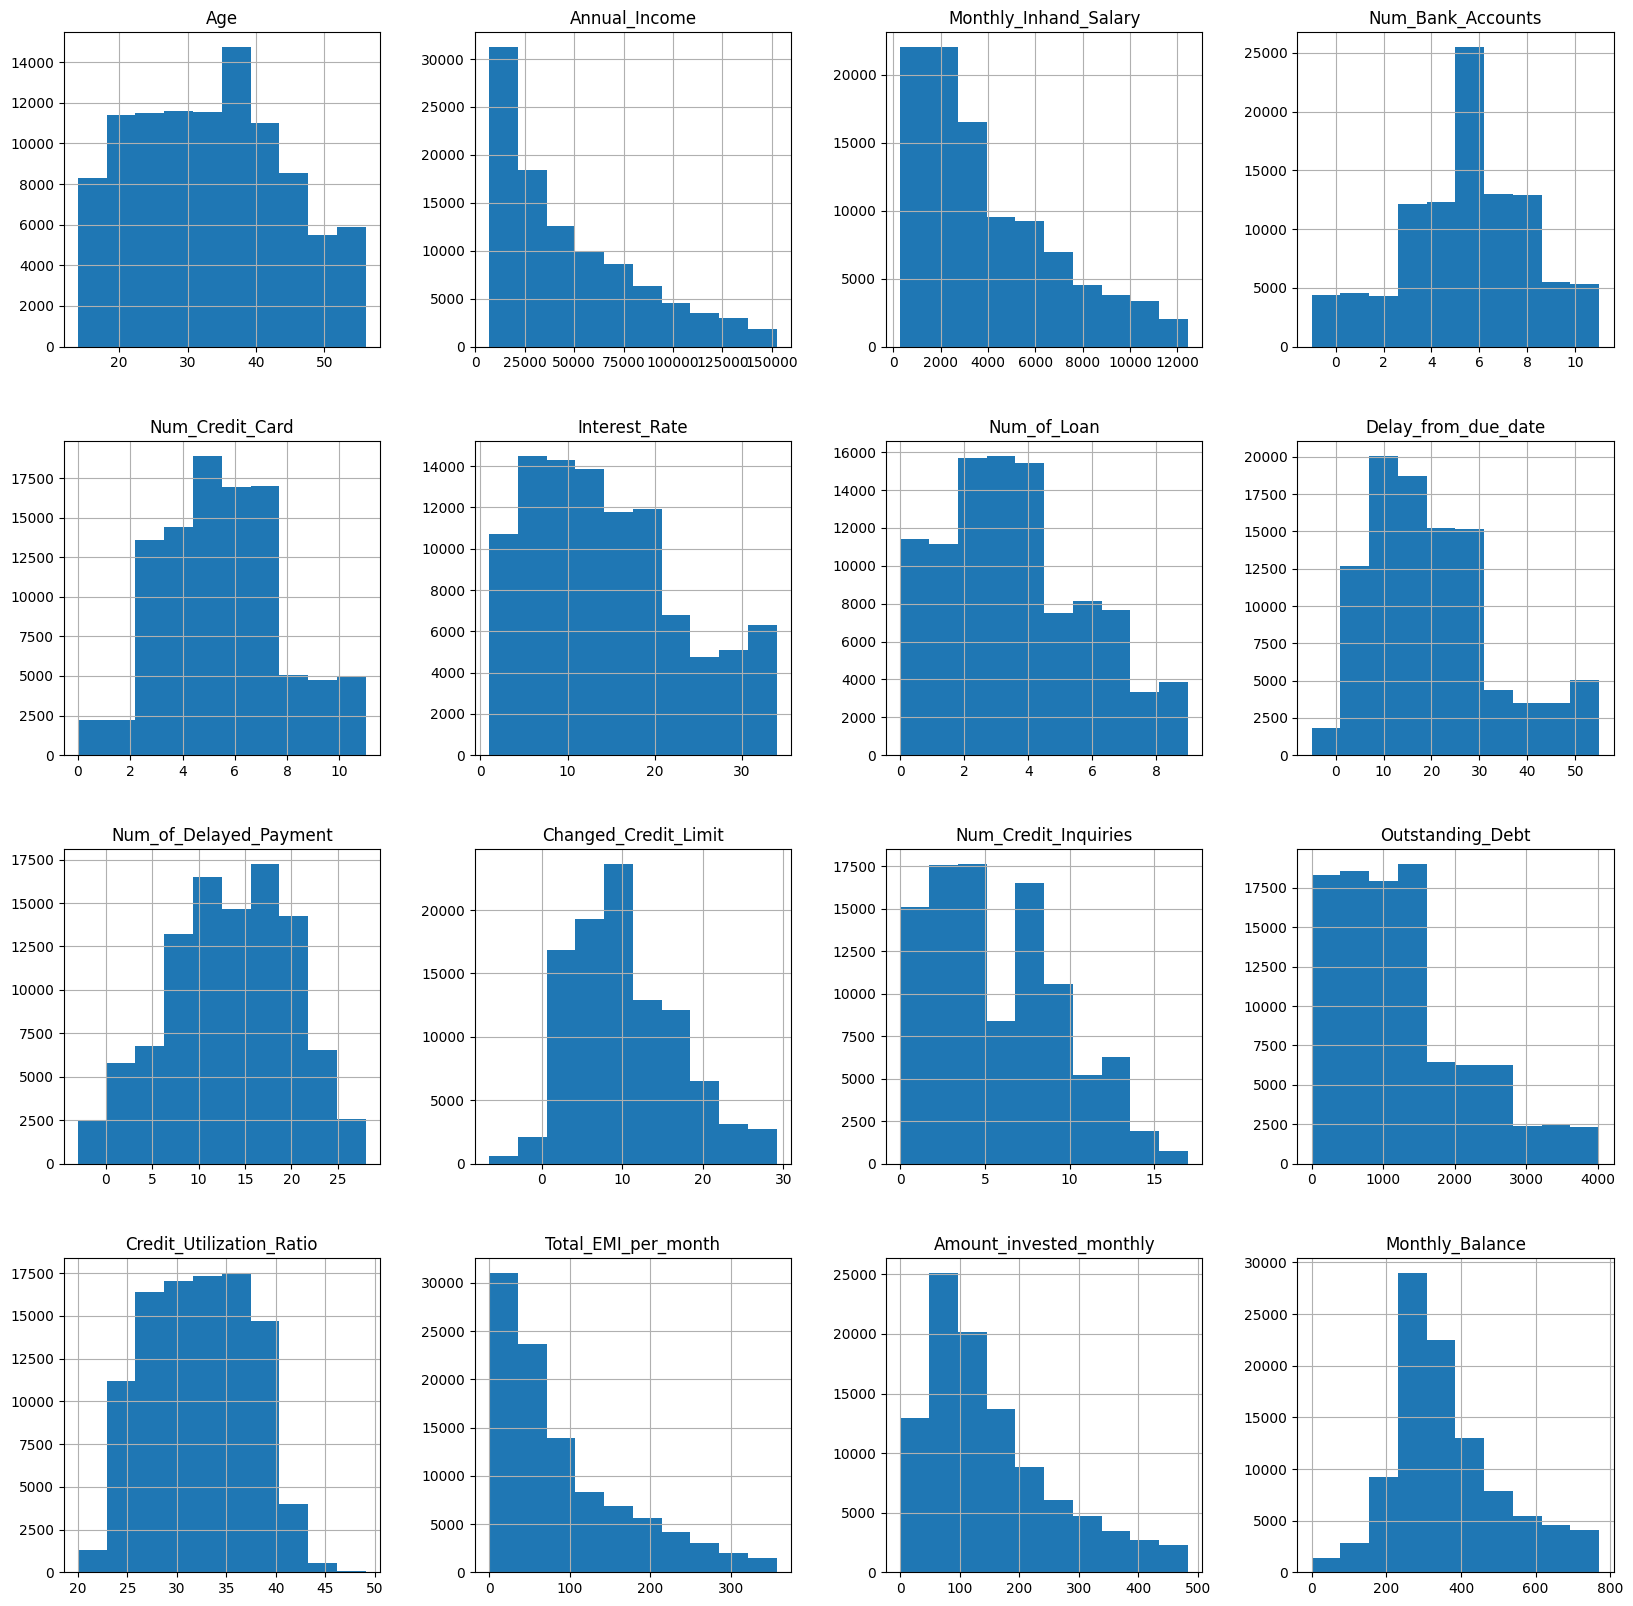

In [25]:
train.hist(figsize=(20, 20))
plt.show()

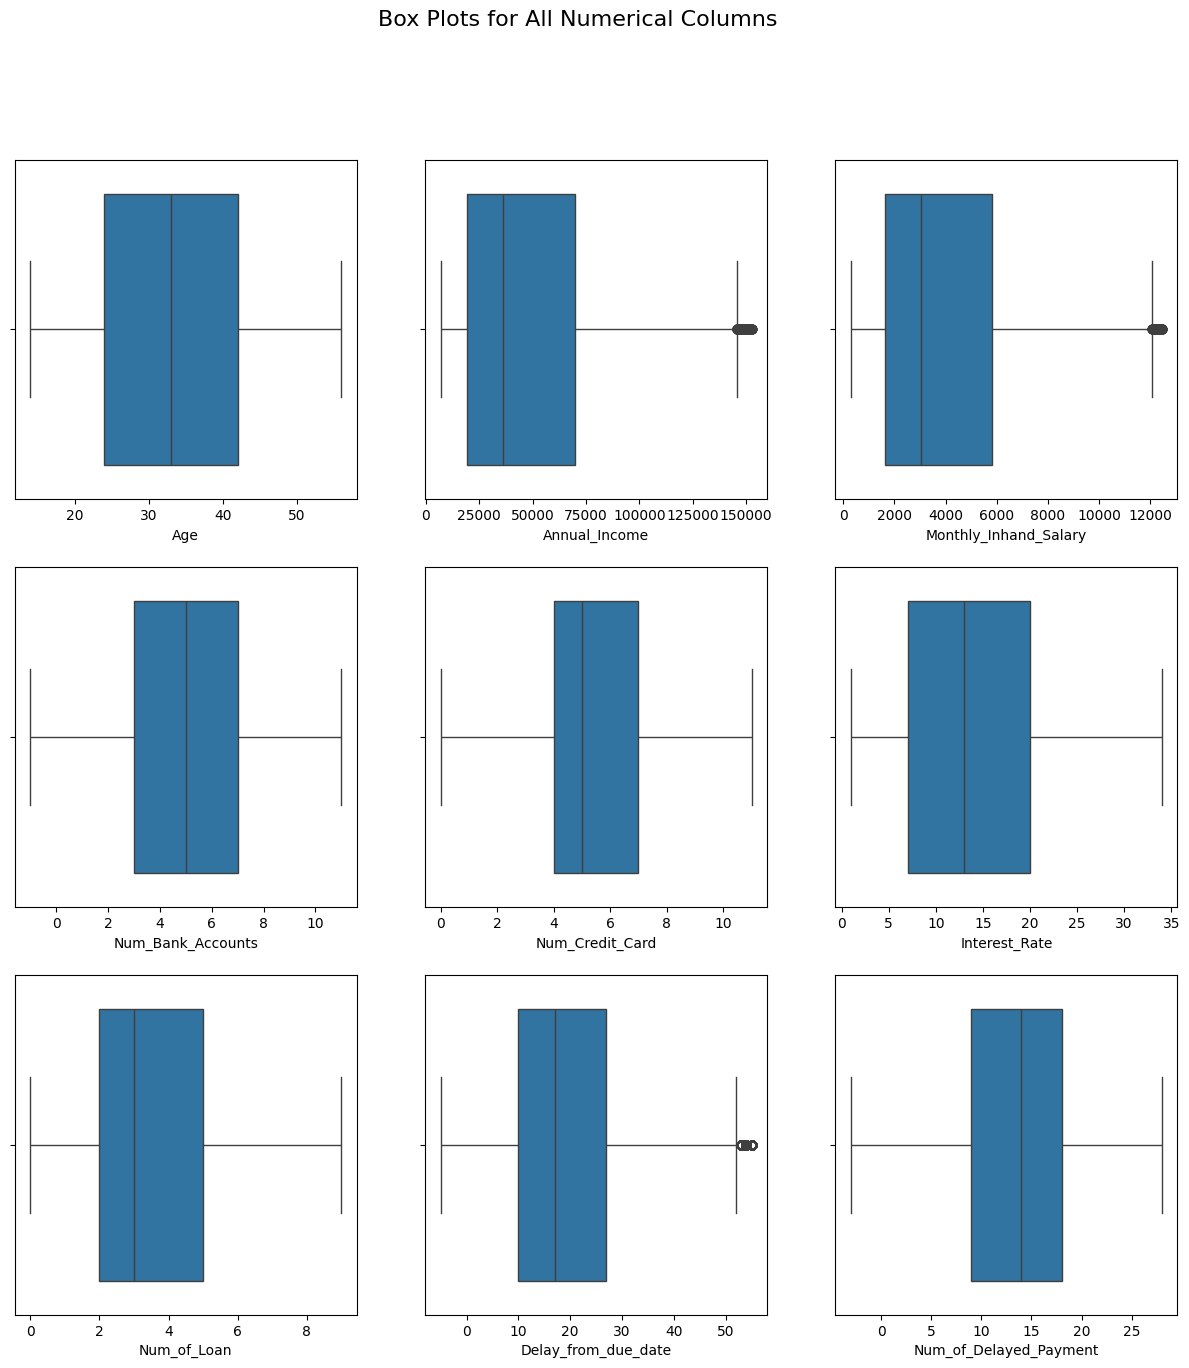

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Box Plots for All Numerical Columns', fontsize=16)

numerical_columns = train.select_dtypes(include=[np.number]).columns

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(x=train[column], ax=ax)

plt.show()

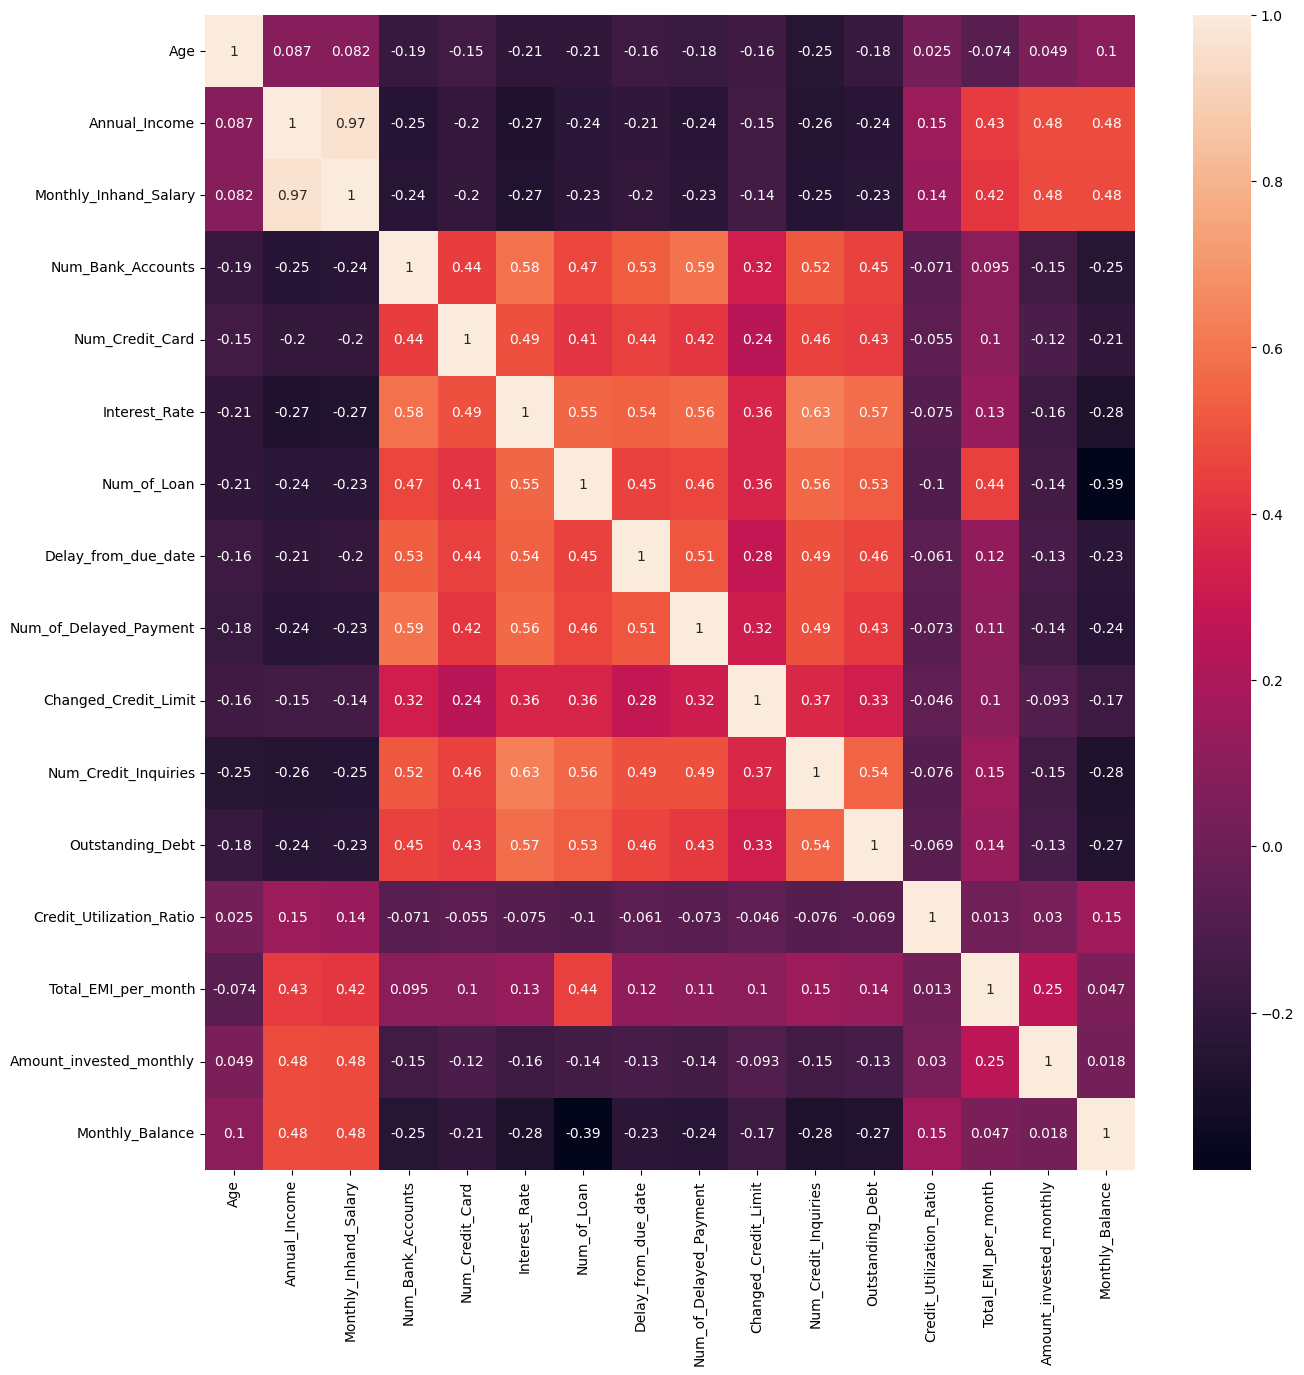

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

This graphs after data cleaning and handling outliers and corrupted data

In [28]:
x = train.drop('Credit_Score', axis=1)
y = train['Credit_Score']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
encoder = OrdinalEncoder()
categorical_columns = ['Type_of_Loan', 'Credit_History_Age', 'Occupation', 'Credit_Mix', 'Payment_Behaviour','Payment_of_Min_Amount']

x_train[categorical_columns] = encoder.fit_transform(x_train[categorical_columns])

In [31]:
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)

In [32]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x.columns)

In [33]:
x_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,-1.424324,0.477379,0.580265,0.509914,-0.140622,-1.706057,-0.401201,-1.442888,0.917793,-1.646140,...,-0.459223,-0.274284,0.012635,0.068478,-0.786799,-0.580736,-1.086033,1.343794,-0.405146,0.988268
1,-1.145778,-1.148293,-0.889936,-0.824786,1.016347,0.707749,2.229994,2.239194,-0.618367,0.173686,...,2.647290,-1.517977,2.650728,-0.264558,1.816523,0.861754,0.356960,-0.284565,1.218720,-1.037811
2,1.918230,-0.451577,-0.470113,-0.518994,0.630691,0.224988,0.056398,-1.442888,-0.356404,-1.039531,...,-1.235851,0.969408,-1.303148,-0.238062,0.673601,-2.023225,-1.086033,-0.979971,-0.946435,0.595026
3,0.061255,0.245140,-0.739434,-0.742344,0.630691,0.707749,-0.630000,0.193593,-0.093344,-0.281271,...,-0.718099,0.969408,-1.182987,-1.014428,0.519398,-0.580736,-0.380589,-0.447719,0.136143,-0.483362
4,-0.495837,0.709618,-0.780969,-0.712392,-1.297591,-1.223296,-0.630000,-1.033768,-1.727603,-1.494488,...,-1.235851,-0.274284,-0.567688,0.807463,0.102140,-2.023225,-0.890505,-0.800213,-1.487723,0.165507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,1.175440,-1.148293,0.953554,0.947910,-0.140622,-0.257774,-1.316399,-0.215527,0.325908,-0.584575,...,-1.235851,-0.274284,-1.249271,0.554974,-0.042993,-0.580736,1.091042,2.656165,-0.405146,-0.316263
79995,-1.238627,-1.612771,-0.952872,-0.891062,0.245035,2.156032,0.170798,-0.624647,-1.353291,-0.812053,...,1.611785,0.969408,0.040354,0.250585,-1.176844,0.861754,-0.845685,-0.402102,1.218720,-0.413844
79996,0.432650,0.245140,0.521785,0.603580,-0.911934,0.224988,0.628397,0.193593,1.483919,-0.887879,...,-0.459223,0.969408,-0.709359,1.111879,0.510327,-2.023225,1.026753,1.959355,0.677431,-0.314020
79997,2.011078,-0.916055,-0.825603,-0.725804,-1.683247,0.707749,-1.316399,-0.215527,-0.831555,-0.584575,...,-0.976975,-0.274284,-0.995788,0.886077,-0.823082,-0.580736,-0.612630,0.152262,0.136143,-0.756103


## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [34]:
x_test[categorical_columns] = encoder.transform(x_test[categorical_columns])

In [35]:
y_test = target_encoder.transform(y_test)

In [36]:
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x.columns)

In [37]:
x_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,-1.145778,0.941857,-1.094143,-1.105530,-0.526278,0.707749,0.056398,0.602713,0.519367,-0.129619,...,0.576281,0.969408,0.197171,0.789448,-1.131490,0.861754,-0.689426,-1.029569,1.218720,-0.465161
1,0.804045,0.245140,-0.263768,-0.267044,1.016347,-1.223296,-0.744400,0.193593,-0.770723,0.173686,...,-1.494727,0.969408,-0.114827,-0.306516,-0.324188,-0.580736,0.361722,1.205470,0.136143,-1.164429
2,0.711196,-1.148293,2.318120,2.357911,-0.140622,-1.706057,-0.401201,-0.624647,0.166428,-1.267010,...,-0.718099,-0.274284,-0.061714,-2.098461,-0.995428,-0.580736,1.380107,1.757205,1.218720,1.758029
3,1.825381,-0.916055,-0.882166,-0.944875,-1.683247,-1.706057,-0.630000,-0.624647,-0.959249,-1.191184,...,-0.976975,-0.274284,-0.495925,-1.356133,0.283556,-0.580736,-0.795059,-0.230601,1.218720,-0.670967
4,-1.052929,0.012901,-0.479615,0.035226,1.016347,-1.223296,-0.630000,0.193593,0.011880,-0.963705,...,-0.459223,0.969408,0.193134,-0.664844,0.927584,0.861754,-0.090111,-0.645345,-0.405146,0.127051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.639684,-0.916055,0.690972,0.613747,0.245035,0.707749,-1.087599,-1.033768,-0.576716,0.931946,...,-0.976975,0.969408,-0.283081,1.092985,-0.160913,-0.580736,-0.439260,2.532676,0.136143,0.038646
19996,0.896894,1.638573,0.191992,0.221868,1.402004,1.673271,0.742797,2.239194,0.748996,0.249512,...,0.317405,-1.517977,-0.927965,0.288469,-0.451179,0.861754,0.083125,-0.065086,-0.946435,-1.076888
19997,-1.795719,0.245140,-0.358634,-0.409912,0.630691,0.224988,-1.087599,-0.624647,1.702588,-0.508749,...,-0.459223,0.969408,0.013879,0.106686,1.689532,0.861754,-0.692001,0.473119,-0.946435,-0.327936
19998,-0.310139,1.174095,-0.911437,-0.978547,0.630691,-0.257774,-0.286801,-1.442888,-0.806894,-0.432923,...,-1.494727,0.969408,0.061405,1.159321,-0.795870,-0.580736,-1.086033,-0.099512,1.218720,-0.669777


----------------------

# `05` Logistic Regression

Using `sklearn` implementation of logistic regression to model the data.

Hint: Look for `sklearn.linear_model.LogisticRegression` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- `random_state` $= 1234$

In [41]:
LR = LogisticRegression(penalty= None , random_state=1234)
LR.fit(x_train, y_train)

LogisticRegression(penalty=None, random_state=1234)

In [42]:
y_pred = LR.predict(x_test)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [43]:
print("classification_report: \n", classification_report(y_test, y_pred))

classification_report: 
               precision    recall  f1-score   support

           0       0.57      0.53      0.55      3514
           1       0.67      0.53      0.59      5879
           2       0.66      0.75      0.70     10607

    accuracy                           0.65     20000
   macro avg       0.63      0.60      0.61     20000
weighted avg       0.65      0.65      0.64     20000



## `iii` Regularization Mode: On

Let's try the default $l_2$ regularization. Use default $C$ parameter for simplicity. Does regularization make the model generalize better?

`Bonus:` You can use `solver='saga'` parameter to be able to try the $l_1$ regularization and compare the two.

In [44]:
LR2 = LogisticRegression(random_state=1234)
LR2.fit(x_train, y_train)

LogisticRegression(random_state=1234)

In [45]:
y_pred2 = LR2.predict(x_test)

In [46]:
print("classification_report: \n", classification_report(y_test, y_pred2))

classification_report: 
               precision    recall  f1-score   support

           0       0.57      0.53      0.55      3514
           1       0.67      0.53      0.59      5879
           2       0.66      0.75      0.70     10607

    accuracy                           0.65     20000
   macro avg       0.63      0.60      0.61     20000
weighted avg       0.65      0.65      0.64     20000



In [47]:
LR3 = LogisticRegression(solver= 'saga', penalty='l1', random_state=1234)
LR3.fit(x_train, y_train)

LogisticRegression(penalty='l1', random_state=1234, solver='saga')

In [48]:
y_pred3 = LR2.predict(x_test)

In [49]:
print("classification_report: \n", classification_report(y_test, y_pred3))

classification_report: 
               precision    recall  f1-score   support

           0       0.57      0.53      0.55      3514
           1       0.67      0.53      0.59      5879
           2       0.66      0.75      0.70     10607

    accuracy                           0.65     20000
   macro avg       0.63      0.60      0.61     20000
weighted avg       0.65      0.65      0.64     20000



## `iv` Tuning Hyperparameters

1. Try different `C` values and evaluate. What is the best panalty value?
2. Try training the model while using the `class_weight` parameter and compare the results. Did it affect the model evaluation?
3. You can tune other parameters as you see fit (but make sure you elaborate your reasoning).

`Note:` Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [50]:
params = [
    {
        'solver': ['sag'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l2']
    }, 
    {
        'solver': ['saga'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2']
    },
    {
        'solver': ['lbfgs'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l2']
    } 
]

In [51]:
grid_search = GridSearchCV(LR, param_grid=params, cv=5, n_jobs=-1, verbose=1)

In [52]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty=None, random_state=1234),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2'], 'solver': ['saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l2'], 'solver': ['lbfgs']}],
             verbose=1)

In [53]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.604120,0.116270,0.009646,0.006166,0.001,l2,sag,"{'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}",0.641813,0.644938,0.645500,0.644437,0.646353,0.644608,0.001536,26
1,2.230228,0.174500,0.021235,0.018514,0.01,l2,sag,"{'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}",0.644125,0.648312,0.648375,0.646875,0.650228,0.647583,0.002031,21
2,4.217498,0.162912,0.008027,0.006926,0.1,l2,sag,"{'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}",0.644687,0.648813,0.648000,0.646875,0.649978,0.647671,0.001804,7
3,5.973661,0.746550,0.009083,0.003600,1,l2,sag,"{'C': 1, 'penalty': 'l2', 'solver': 'sag'}",0.644687,0.648750,0.647813,0.646875,0.649916,0.647608,0.001774,16
4,6.722989,0.811620,0.015707,0.016182,10,l2,sag,"{'C': 10, 'penalty': 'l2', 'solver': 'sag'}",0.644687,0.648687,0.647813,0.647000,0.649916,0.647621,0.001757,10
5,8.469348,1.518962,0.016082,0.007350,100,l2,sag,"{'C': 100, 'penalty': 'l2', 'solver': 'sag'}",0.644625,0.648687,0.647813,0.646938,0.649916,0.647596,0.001782,19
6,8.651404,1.020342,0.013864,0.010185,1000,l2,sag,"{'C': 1000, 'penalty': 'l2', 'solver': 'sag'}",0.644625,0.648687,0.647813,0.646938,0.649916,0.647596,0.001782,19
7,4.062750,0.344963,0.016772,0.009246,0.001,l1,saga,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}",0.633500,0.632000,0.634625,0.633188,0.633665,0.633395,0.000847,28
8,3.367073,0.327171,0.010153,0.005329,0.001,l2,saga,"{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}",0.641813,0.644938,0.645437,0.644437,0.646353,0.644596,0.001529,27
9,5.236374,0.353336,0.013139,0.009517,0.01,l1,saga,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}",0.643813,0.647437,0.646875,0.647437,0.648478,0.646808,0.001585,24


In [54]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

In [55]:
grid_search.best_score_

0.6476956255078443

In [56]:
best = grid_search.best_estimator_

In [57]:
best.score(x_test, y_test)

0.64775

-----------------------------

# `06` Logistic Regression with Gradient Descent

The `LogisticRegression` class optimizes the model paramters via solvers (e.g., `lbfgs`, `saga`, etc.) instead of using gradient descent.

If we want to train the logistic regression model using gradient descent we can use `SGDClassifier` and tune the parameters almost the same way we did with `SGDRegressor`.

Try this and do hyperparameter tuning if needed to decide which model is better.

`Notes:`
- You will have to set `loss='log_loss'` to use `SGDClassifier` as a logistic regression model.
- The `alpha` parameter is the inverse of the `C` parameter and hence bigger values will result in more regularization.



In [58]:
SGD = SGDClassifier(loss='log_loss', alpha=0.01 , random_state=1234)
SGD.fit(x_train, y_train)

SGDClassifier(alpha=0.01, loss='log_loss', random_state=1234)

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [59]:
y_pred_SGD = SGD.predict(x_test)

In [60]:
print("classification_report: \n", classification_report(y_test, y_pred_SGD))

classification_report: 
               precision    recall  f1-score   support

           0       0.54      0.51      0.52      3514
           1       0.66      0.51      0.57      5879
           2       0.65      0.75      0.70     10607

    accuracy                           0.64     20000
   macro avg       0.62      0.59      0.60     20000
weighted avg       0.63      0.64      0.63     20000



-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

In [61]:
numerical_columns = x_train.drop(columns=categorical_columns).columns.to_list()

preprocessing = ColumnTransformer(
    transformers=[
        ('encoder', OrdinalEncoder(), categorical_columns),
        ('scaler', StandardScaler(), numerical_columns)
    ]) 

pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('SGDClassifier', SGDClassifier(loss='log_loss', alpha=0.1 , random_state=1234))
])

In [62]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  ['Type_of_Loan',
                                                   'Credit_History_Age',
                                                   'Occupation', 'Credit_Mix',
                                                   'Payment_Behaviour',
                                                   'Payment_of_Min_Amount']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Num_Credit_Inquiries',
                                                   'Outstanding_Debt',
                                                   'Credit_Utilization_Ratio',
                                                   'Total_EMI_per_month',
                                                   'Amount_invested_monthly',
                                                   'Monthly_Balance'])])),
                ('SGDClassifier',
                 SGDClassifier(alpha=0.1, loss='log_loss', random_state=1234))])

In [63]:
y_pred_pipeline = pipeline.predict(x_test)

In [64]:
print("classification_report: \n", classification_report(y_test, y_pred_pipeline))

classification_report: 
               precision    recall  f1-score   support

           0       0.50      0.58      0.54      3514
           1       0.58      0.71      0.64      5879
           2       0.72      0.60      0.65     10607

    accuracy                           0.63     20000
   macro avg       0.60      0.63      0.61     20000
weighted avg       0.64      0.63      0.63     20000



----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$